# CMPS 184 Class presentation Carlos del Rey 1710268
## Networkx and code from *Web Scraping with Python* by Ryan Mitchell

In this tutorial I will be showing how to use *Networkx*, a pyhton library that allows us to create, draw and manipulate Graphs - [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html). To link it with the course topic, I will be using some code from the third chapter of the book *Web Scraping with Python* by Ryan Mitchell on how to **traverse domains** and I will try to show some pages from a domain in a graph structure.

---


### Networkx

---

#### Intro

---

In [114]:
# First let's import the library, shall we?
import networkx as nx
#And then let's create a really simple graph with only one node
#First we create the graph
G = nx.Graph()
#Then we add teh first node
G.add_node('node1')
#And finally we plot it
nx.draw(G, with_labels=True)

#### Nodes and edges

---

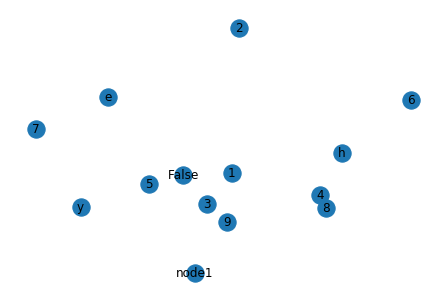

In [115]:
#The last graph is a bit weird, isn't it? That's because 
#there are no edges and we only have one node
#Let's add more nodes first
#We can add nodes from an iterable container also 
#(a node can be any hashable object (except None))
G.add_nodes_from([1, False])
#Or from another graph
H = nx.path_graph(10)
G.add_nodes_from(H)
#Or from a string
G.add_nodes_from('hey')
#We will see that all nodes from a graph are a set, 
#as if we add a repeated node, it won't appear
nx.draw_random(G, with_labels=True)

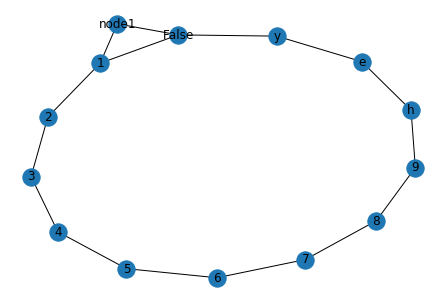

In [116]:
#Now let's get the traditional graph set up by adding edges to the
#already existing nodes
#Edges are just a couples of nodes
G.add_edge(1, 2)
#We can also add edges as elements of a tuple
tup = (2,3)
G.add_edge(*tup) #this is unpacking the tuple
#From a list of tuples
tups = [(3,4),(4,5),(5,6),(6,7),(9,'h'),('h','e'),('e','y')
        ,('y', False),(False,'node1'),('node1',1)]
G.add_edges_from(tups)
#Or from anotehr graph (adding repeated edges has the same effect 
#as adding repeated nodes)
G.add_edges_from(H.edges)
nx.draw(G, with_labels=True)

In [117]:
#There are 4 basic graph properties that we can access easily
#The number of nodes
G.number_of_nodes()

14

In [118]:
#The number of edges
G.number_of_edges()

15

In [119]:
#The adjacents of a node (nodes that share edges with the first one)
#This is a dictionary where the keys are the nodes
G.adj['node1']
#or G['node1']

AtlasView({False: {}, 1: {}})

In [120]:
#The degree of a node (number of edges incident to a node)
#This is also a dictionary where the keys are the nodes
G.degree[False]

3

In [121]:
#You can also see the edges for specific nodes
G.edges('node1')

EdgeDataView([('node1', False), ('node1', 1)])

In [122]:
#Or for any number of them
G.edges([1, False])

EdgeDataView([(1, 2), (1, 'node1'), (1, 0), (False, 'y'), (False, 'node1')])

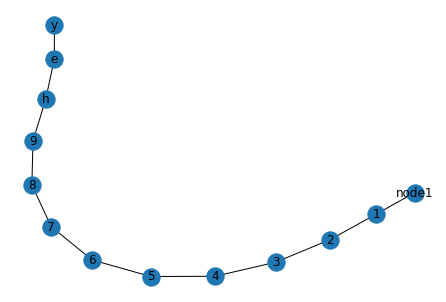

In [123]:
#We can get rid of nodes in the same ways we create them
#One by one
G.remove_node(False)
nx.draw_spring(G, with_labels=True)

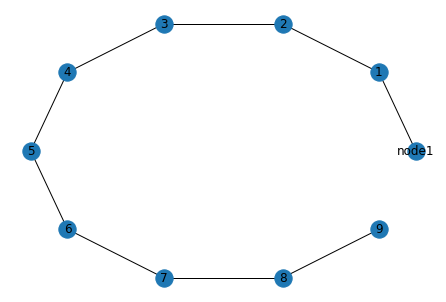

In [124]:
#Or using a nbunch (any of: None (meaning all nodes),
#a node, or an iterable container of nodes that is not itself 
#a node in the graph.)
G.remove_nodes_from('hey')
nx.draw_circular(G, with_labels=True)

In [125]:
#Same with edges
#One by one
G.remove_edge(1, 'node1')
nx.draw_circular(G, with_labels=True)

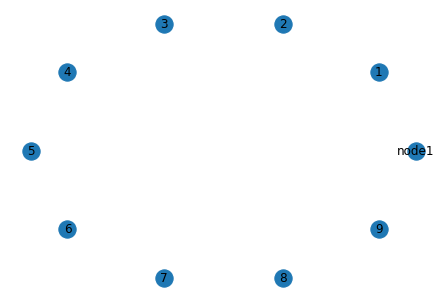

In [126]:
#An ebunch is any iterable container of edge-tuples. 
#An edge-tuple can be a 2-tuple of nodes or
# a 3-tuple with 2 nodes followed by 
#an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415})
G.remove_edges_from(H.edges)
nx.draw_circular(G, with_labels=True)

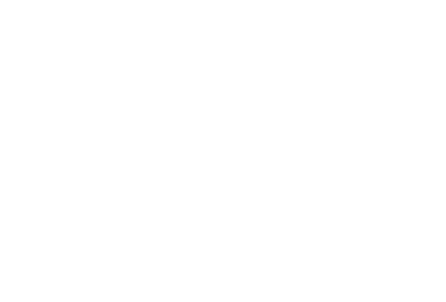

In [127]:
#Besides that, we can get rid of all of the nodes and edges
G.clear()
nx.draw(G, with_labels=True)

#### Accessing edges and neighbors

---

In [128]:
#First we are going to create another graph 
#(they can be created used graph generators like the next one
#but there are much more: https://networkx.github.io/documentation/stable/reference/generators.html)
T = nx.tetrahedral_graph()
nx.draw(T, with_labels=True)

In [129]:
#To get the edge between 0 and 1
T.edges[0,1]
#or T[0,1]

{}

In [130]:
#To get the adjacents of 3
T.adj[3]
#or T[3]

AtlasView({0: {}, 1: {}, 2: {}})

In [131]:
#If we wanted to see all the details for the graph
list(T.adjacency())
#or T.adj.items()

[(0, {1: {}, 2: {}, 3: {}}),
 (1, {0: {}, 2: {}, 3: {}}),
 (2, {0: {}, 1: {}, 3: {}}),
 (3, {0: {}, 1: {}, 2: {}})]

#### Adding attributes to graphs, nodes, and edges

---

In [132]:
#We can set any kind of attributes to all of them when we declare them
#as long as they are in a dictionary layout (keys must be hashable)
J = nx.Graph(info="something useful")
J.graph

{'info': 'something useful'}

In [133]:
#And we can modify them later
J.graph['info'] = 'something more useful'
J.graph

{'info': 'something more useful'}

In [134]:
#Same with nodes
J.add_node(1, time='5pm')
J.add_nodes_from([3,5], time='2pm')
J.nodes[1]['room'] = 714
J.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}, 5: {'time': '2pm'}})

In [135]:
#And edges
#IMPORTANT: the attribute weight should be numeric as it is used
#by algorithms
J.add_edge(1, 2, weight=4.7 )
J.add_edges_from([(3, 4), (4, 5)], color='red')
J.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
J[1][2]['weight'] = 4.7
J.edges[3, 4]['weight'] = 4.2
J.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (5, 4, {'color': 'red'})])

#### Directed graphs

---

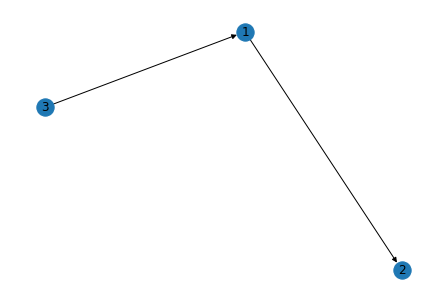

In [136]:
#Directed graphs are those in which every two nodes represent a tuple
#and the edges have directions (we can see parent-child relationships)
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG, with_labels=True)

In [137]:
#We can see the out degree of a node
DG.out_degree(1, weight='weight')

0.5

In [138]:
#We can see the in degree of a node also
DG.in_degree(1, weight='weight')

0.75

In [139]:
#And the sum degree
DG.degree(1, weight='weight')

1.25

In [140]:
#We can access the list of succesors of a node
list(DG.successors(1))

[2]

In [141]:
#The list of predecesors of a node
list(DG.predecessors(2))

[1]

In [142]:
#And also the list of neighbors of a node
list(DG.neighbors(1))

[2]

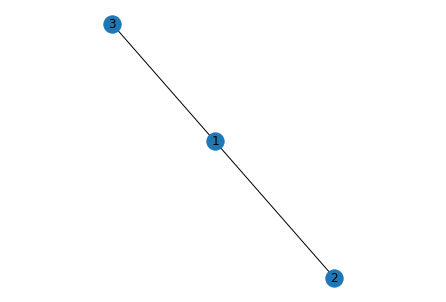

In [143]:
#In addition, it is possible to convert a directed graph to an undirected graph
U = nx.Graph(DG)
nx.draw(U, with_labels=True)

### Book code

---

In [152]:
#Import libraries to get the beautiful soup object
from urllib.request import urlopen 
from bs4 import BeautifulSoup
import re
#We create a set so we don't obtain duplicate pages
pages = set()
#We define a function to, given a partial URL, find the "relevant" URLs
#In that page
##MODIFIED: Now also stores the first ten URLS that it can get from a page,
#and it builds a directed graph with the visited pages
#Here we have the graph for the domain
domain = nx.DiGraph()
def getLinks(parent, pageUrl):
    global pages
    children = []
    #We build the complete URL
    page = 'http://en.wikipedia.org{}'.format(pageUrl)
    #We add the new edge if there is a pair of nodes
    if parent is not None:
        domain.add_edge(parent,pageUrl)
        #We stop if the graph is too deep
        if list(domain.predecessors(parent)):
            if list(domain.predecessors(list(domain.predecessors(parent))[0])):
                  return 
    else:
        #For the first call to the function
         pageUrl = page
    #We get html document
    html = urlopen(page) 
    #And the beautiful soup object
    bs = BeautifulSoup(html, 'html.parser') 
    children = []
    #For all the relevant links that we can find in the page
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')): 
        #If there's a url in the element
        if 'href' in link.attrs:
            #And i'ts not in the set
            if link.attrs['href'] not in pages: 
                #We have encountered a new page
                newPage = link.attrs['href']
                #We add it to the set
                pages.add(newPage)
                #And we store it as a child of the actuat node
                children.append(newPage)
                #When we haave a certain amount of children for the current page, stop the current loop
                if len(children) > 2:
                    break
    #For every new page found in the current one
    for child in children:
        #Repeat the process
        getLinks(pageUrl, child)
    return

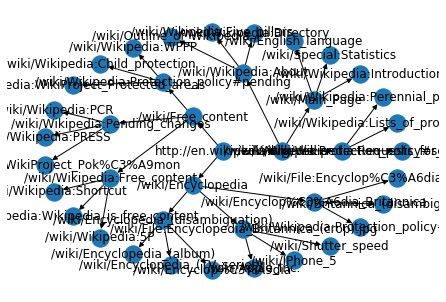

In [153]:
#Call the function
getLinks(None, '')
#This is for drawing in using a shell layout
shells = []
shells.append(['http://en.wikipedia.org'])
shell2 = []
shell3 = []
shell4 = []
for node in (list(domain.successors('http://en.wikipedia.org'))):
    shell2.append(node)
    for nodee in list(domain.successors(node)):
        shell3.append(nodee)
        for nodeee in list(domain.successors(nodee)):
            shell4.append(nodeee)
shells.append(shell2)
shells.append(shell3)
shells.append(shell4)
#We draw the graph
nx.draw_shell(domain, nlist=shells, with_labels=True)
#And we save it for using third party tools to visualize it
nx.write_graphml(domain, './domain.graphml')